In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

#### Data description:
The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

File name: medical_examination.csv

#### Tasks
Create a chart: counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks:

- Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
- Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If  the value is more than 1, make the value 1.
- Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. 
- Clean the data. Filter out the following patient segments that represent incorrect data:
    -diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    -height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    -height is more than the 97.5th percentile
    -weight is less than the 2.5th percentile
    -weight is more than the 97.5th percentile
- Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. 
- Any time a variable is set to None, make sure to set it to the correct code.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
path_data_columns="data/columns_medical.tsv"
info=pd.read_csv(path_data_columns, sep="\t",index_col=["Variable"])
info

,Feature,Variable Type,Value Type
Variable,,,
age,Age,Objective Feature,int (days)
height,Height,Objective Feature,int (cm)
weight,Weight,Objective Feature,float (kg)
gender,Gender,Objective Feature,categorical code
ap_hi,Systolic blood pressure,Examination Feature,int
ap_lo,Diastolic blood pressure,Examination Feature,int
cholesterol,Cholesterol,Examination Feature,"1: normal, 2: above normal, 3: well above normal"
gluc,Glucose,Examination Feature,"1: normal, 2: above normal, 3: well above normal"
smoke,Smoking,Subjective Feature,binary


In [62]:
path_file="data/medical_examination.csv"
df=pd.read_csv(path_file,index_col=["id"])
df.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1


In [25]:
#df.info()

In [46]:
df.describe() 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
#add column "overweight"
height_m=(df["height"]/100)
df["overweight"]=(df["weight"]/height_m**2).apply(lambda x: 1 if x>25 else 0)
df.head(1)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0


In [64]:
#Normalize the data by making 0 always good and 1 always bad. 
#If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
df["cholesterol"]=df["cholesterol"].apply(lambda x: 0 if x==1 else 1)
df["gluc"]=df["gluc"].apply(lambda x: 0 if x==1 else 1)

In [65]:
#df[df["cardio"]==0]
#df[df["cardio"]==0]
#Create DataFrame for cat plot using "pd.melt" using just the values from cholesterol, gluc, smoke , alco, active , overweight
df_cat=pd.melt(df, id_vars="cardio", value_vars=["cholesterol","gluc","smoke","alco","active","overweight"])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [69]:
#Group and reformat the data to split it by "cardio". Show the counts of each feature. 
#You will have to rename one of the columns for the catplot to work correctly.
df_cat["total"]=1
df_2=df_cat.groupby(["cardio","variable","value"],as_index=False).count()

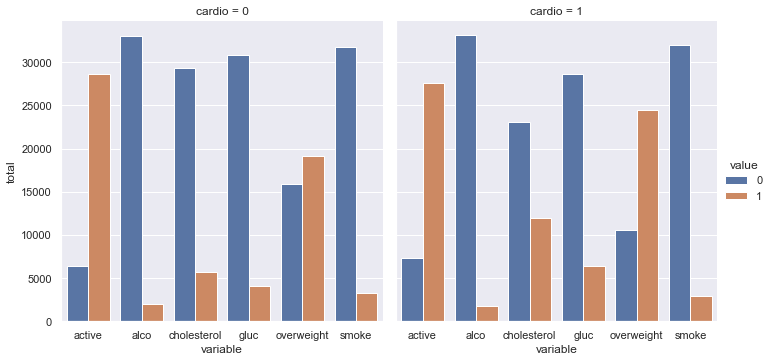

In [71]:
#Draw the catplot with sns.catplot
sns.set_theme(style="darkgrid")
fig =sns.catplot(x="variable",y="total",data=df_2,hue="value",kind="bar", col = "cardio").fig